In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [3]:
def model_fn(a_layer= None):
    model= keras.Sequential()
    model.add(keras.layers.Flatten(input_shape= (28, 28)))
    model.add(keras.layers.Dense(100, activation= 'relu'))
    
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation= 'softmax'))
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)

history = model.fit(
    train_scaled, train_target,
    epochs= 5,
    verbose= 0
)

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


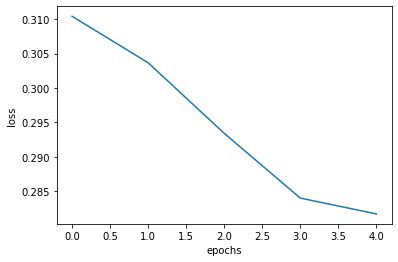

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

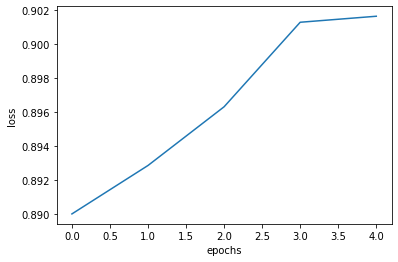

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

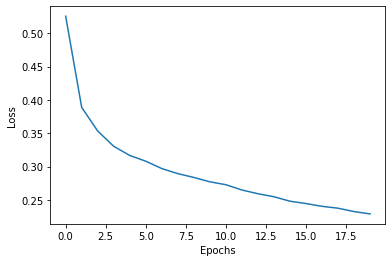

In [13]:
# Epochs 증가

model = model_fn()
model.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)

history = model.fit(
    train_scaled, train_target,
    epochs= 20,
    verbose= 0
)

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show

In [14]:
# validation data 추가

model= model_fn()

model.compile(loss= 'sparse_categorical_crossentropy', metrics= 'accuracy')
history= model.fit(train_scaled, train_target,
                   epochs= 20,
                   verbose= 1,
                   validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5299 - accuracy: 0.8125 - val_loss: 0.4156 - val_accuracy: 0.8482
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3925 - accuracy: 0.8600 - val_loss: 0.3843 - val_accuracy: 0.8622
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3565 - accuracy: 0.8718 - val_loss: 0.3653 - val_accuracy: 0.8724
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3346 - accuracy: 0.8801 - val_loss: 0.3732 - val_accuracy: 0.8701
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3192 - accuracy: 0.8863 - val_loss: 0.3786 - val_accuracy: 0.8742
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3078 - accuracy: 0.8916 - val_loss: 0.3577 - val_accuracy: 0.8778
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2971 - accuracy: 0.8959 - val_loss: 0.3817 - val_accuracy:

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


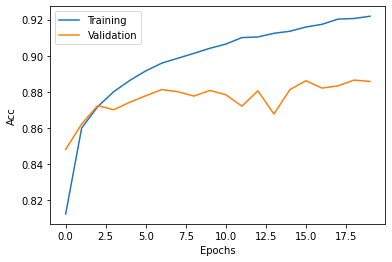

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Training', 'Validation'])
plt.show()

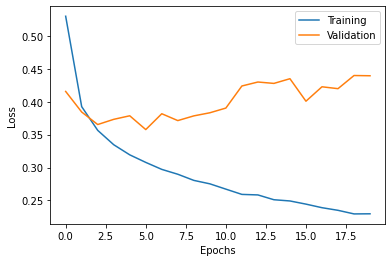

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

5번 째 에포크만에 증가
훈련 손실 감소, 검증 손실은 증가 => 과대적합 발생
옵티마이저 파라미터 조정을 통해 과대적합 방지

In [18]:
model = model_fn()
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)
with tf.device('/gpu:0'):
    history = model.fit(
        train_scaled, train_target,
        epochs= 20,
        verbose= 1,
        validation_data= (val_scaled, val_target)
    )

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5239 - accuracy: 0.8182 - val_loss: 0.4166 - val_accuracy: 0.8525
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3938 - accuracy: 0.8582 - val_loss: 0.3705 - val_accuracy: 0.8661
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3501 - accuracy: 0.8725 - val_loss: 0.3607 - val_accuracy: 0.8697
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3239 - accuracy: 0.8804 - val_loss: 0.3603 - val_accuracy: 0.8718
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3050 - accuracy: 0.8880 - val_loss: 0.3377 - val_accuracy: 0.8844
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2905 - accuracy: 0.8940 - val_loss: 0.3423 - val_accuracy: 0.8763
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2767 - accuracy: 0.8987 - val_loss: 0.3269 - val_accuracy:

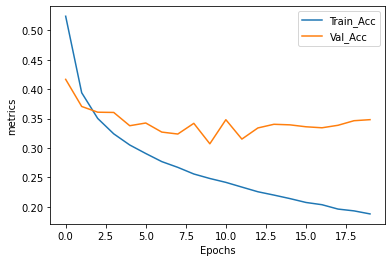

In [21]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train_Acc', 'Val_Acc', 'Train_loss', 'Val_loss'])
plt.xlabel('Epochs')
plt.ylabel('metrics')
plt.show()

In [22]:
# Dropoput 적용
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)

history= model.fit(
    train_scaled, train_target,
    epochs= 20,
    verbose= 1,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5988 - accuracy: 0.7887 - val_loss: 0.4324 - val_accuracy: 0.8406
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4431 - accuracy: 0.8414 - val_loss: 0.3890 - val_accuracy: 0.8557
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4042 - accuracy: 0.8532 - val_loss: 0.3854 - val_accuracy: 0.8583
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3847 - accuracy: 0.8588 - val_loss: 0.3671 - val_accuracy: 0.8637
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3700 - accuracy: 0.8648 - val_loss: 0.3529 - val_accuracy: 0.8683
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3563 - accuracy: 0.8709 - val_loss: 0.3368 - val_accuracy: 0.8760
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3431 - accuracy: 0.8744 - val_loss: 0.3315 - val_accuracy:

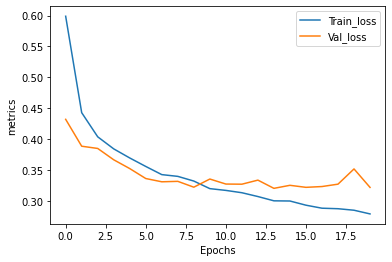

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train_loss', 'Val_loss'])
plt.xlabel('Epochs')
plt.ylabel('metrics')
plt.show()

10 Epochs에서 검증 손실 증가 ==> Epochs= 10으로 변경하여 과대적합 방지하기

In [25]:
# Epochs= 10 변경

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
history= model.fit(
    train_scaled, train_target,
    epochs= 10,
    verbose= 1,
    validation_data=(val_scaled, val_target)
)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.8959 - val_loss: 0.3263 - val_accuracy: 0.8852
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2763 - accuracy: 0.8960 - val_loss: 0.3324 - val_accuracy: 0.8834
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2709 - accuracy: 0.8975 - val_loss: 0.3389 - val_accuracy: 0.8828
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.8992 - val_loss: 0.3375 - val_accuracy: 0.8855
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.8977 - val_loss: 0.3334 - val_accuracy: 0.8844
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9009 - val_loss: 0.3258 - val_accuracy: 0.8848
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2600 - accuracy: 0.9011 - val_loss: 0.3342 - val_accuracy:

In [27]:
# Model Save

model.save_weights('model-weight.h5')

In [28]:
model.save('model-whole.h5')

In [31]:
# 훈련하지 않은 모델 + 훈련된 모델 파라미터
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

In [32]:
import numpy as np

val_labels= np.argmax(model.predict(val_scaled), axis= -1)
print(np.mean(val_labels == val_target))

0.883


In [34]:
# 훈련된 모델 구조와 파라미터를 통해 정확도 계산

model = keras.models.load_model('model-whole.h5')
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 80.3989 - accuracy: 0.8538


[80.3989486694336, 0.8537999987602234]

**Callback**

In [36]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-model.h5',
    save_best_only= True
)

with tf.device('/gpu:0'):
    history = model.fit(
        train_scaled, train_target,
        epochs= 20,
        verbose= 1,
        validation_data= (val_scaled, val_target),
        callbacks= [checkpoint_cb]
    )

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5935 - accuracy: 0.7902 - val_loss: 0.4395 - val_accuracy: 0.8347
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4395 - accuracy: 0.8426 - val_loss: 0.4000 - val_accuracy: 0.8528
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8535 - val_loss: 0.3894 - val_accuracy: 0.8547
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3831 - accuracy: 0.8608 - val_loss: 0.3574 - val_accuracy: 0.8695
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8640 - val_loss: 0.3610 - val_accuracy: 0.8700
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.8700 - val_loss: 0.3425 - val_accuracy: 0.8755
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3470 - accuracy: 0.8726 - val_loss: 0.3334 - val_accuracy:

In [38]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [40]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8848


[0.31505087018013, 0.8848333358764648]

In [43]:
model = model_fn(keras.layers.Dropout(0.3))

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    save_best_only= True
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience= 2,
    restore_best_weights= True
)

with tf.device('/gpu:0'):
    model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
    )
    history = model.fit(
        train_scaled, train_target,
        epochs= 20,
        verbose= 1,
        validation_data= (val_scaled, val_target),
        callbacks= ([checkpoint_cb, early_stopping_cb])
    )

Epoch 1/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5950 - accuracy: 0.7909 - val_loss: 0.4220 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4406 - accuracy: 0.8417 - val_loss: 0.3807 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4059 - accuracy: 0.8539 - val_loss: 0.3611 - val_accuracy: 0.8658
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3831 - accuracy: 0.8609 - val_loss: 0.3682 - val_accuracy: 0.8662
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3661 - accuracy: 0.8660 - val_loss: 0.3386 - val_accuracy: 0.8767
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3541 - accuracy: 0.8705 - val_loss: 0.3313 - val_accuracy: 0.8773
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3419 - accuracy: 0.8737 - val_loss: 0.3386 - val_accuracy:

In [44]:
print(early_stopping_cb.stopped_epoch)

7


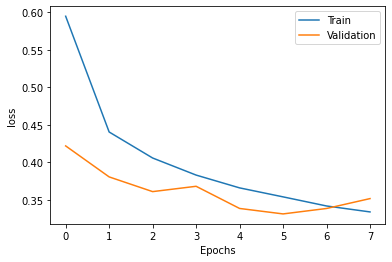

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [47]:
# Early stopped model evaluate

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8773


[0.3313486874103546, 0.8773333430290222]